In [1]:
import pickle 
import numpy as np 
import pandas as pd 
import datapane as dp 
import sweetviz

profile = pickle.load(open('profile_df', 'rb'))

profile 

,user_name,name,type_user,html_url,bio,company,email,followers,following,hireable,location,created_at,updated_at,total_stars,max_star,forks,languages,descriptions,dates
0,josephmisiti,Joseph Misiti,Owner,https://github.com/josephmisiti,Mathematician & Co-founder of Math & Pencil,Math & Pencil,None,2482,273,True,"Brooklyn, NY",2010-04-17 21:09:13,2020-06-18 19:43:56,45137,45132,11411,"[Python, None, None, Python, Python]","[review of algorithms in python, Applied Linea...","[2017-01-09 05:56:49, 2015-04-08 03:18:50, 201..."
1,wepe,wepon,Owner,https://github.com/wepe,None,AntFin,wepon@pku.edu.cn,4503,47,None,China Hangzhou,2014-10-10 14:28:18,2020-06-15 14:01:30,5926,3803,4248,"[Python, Python, Python, Java, Java]","[Solution Code for Kaggle Competition, Basic M...","[2020-06-22 02:26:16, 2020-06-24 02:25:29, 202..."
2,udacity,Udacity,Owner,https://github.com/udacity,Udacity’s mission is to power careers through ...,None,support@udacity.com,0,0,None,"Mountain View, CA",2012-07-03 03:51:49,2019-08-29 23:44:14,18771,5317,12659,"[Jupyter Notebook, Jupyter Notebook, Jupyter N...",[Repo for the Deep Learning Nanodegree Foundat...,"[2020-06-23 13:12:09, 2020-06-23 19:54:10, 202..."
3,ZuzooVn,Nam Vu,Owner,https://github.com/ZuzooVn,A Vietnamese Software Engineer who is really p...,None,zuzoovn@gmail.com,1187,91,True,Vietnam,2012-02-11 16:55:02,2020-06-11 19:42:17,23864,23862,5622,"[JavaScript, JavaScript, None, Java, JavaScript]","[None, Hextelor is a game that tests your brai...","[2019-12-30 11:08:25, 2016-08-11 10:40:09, 202..."
4,rasbt,Sebastian Raschka,Owner,https://github.com/rasbt,Machine Learning researcher & open source cont...,UW-Madison,mail@sebastianraschka.com,12647,33,None,"Madison, WI",2013-10-05 16:06:10,2020-06-23 15:56:31,35623,12483,11582,"[Jupyter Notebook, Python, Jupyter Notebook, J...",[A collection of various deep learning archite...,"[2020-06-23 19:09:56, 2020-06-23 08:44:59, 202..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,jimmysoa,Jimmy,Contributor,https://github.com/jimmysoa,None,None,jimmysoa@sina.cn,503,5,None,BEIJING,2014-01-07 01:45:17,2020-06-09 06:30:52,0,0,0,"[None, None]","[more choices by just spending some memory, pa...","[2014-12-18 13:17:45, 2015-06-04 09:18:10]"
1148,vizhur,None,Contributor,https://github.com/vizhur,None,Microsoft,None,1,0,None,"Boston, MA",2016-08-13 02:27:50,2020-03-19 02:06:57,0,0,0,"[None, Jupyter Notebook, Python, Python, Python]","[None, None, None, None, None]","[2019-04-09 21:17:36, 2017-10-13 22:40:33, 201..."
1149,rdingwall,Richard Dingwall,Contributor,https://github.com/rdingwall,Building a bank at @monzo,Monzo,rdingwall@gmail.com,81,25,None,New York City,2009-12-20 03:44:34,2020-05-24 15:05:37,444,387,64,"[JavaScript, None, None, C#, C#]",[100 Books (http://100books.ws) is a website t...,"[2015-12-15 09:03:30, 2020-05-24 23:08:23, 201..."
1150,xiaomaogy,Vincent(Yuan) Gao,Contributor,https://github.com/xiaomaogy,ML Engineer working on ml-agents.,Unity Technologies,vincentg@unity3d.com,34,13,True,"San Francisco, CA",2013-11-19 22:23:08,2020-06-01 16:50:12,9,6,5,"[PHP, Jupyter Notebook, Jupyter Notebook, Java...","[None, Used text to first train an Recurrent N...","[2015-03-31 17:29:53, 2018-04-25 08:28:41, 201..."


In [ ]:
pickle.load(open('profile_df', 'rb'))

In [107]:
#Find percentage of missing values
profile.isnull().sum()/len(profile)

user_name       0.000000
name            0.121528
type_user       0.000000
html_url        0.000000
bio             0.523438
company         0.486111
email           0.568576
followers       0.000000
following       0.000000
hireable        0.763021
location        0.331597
created_at      0.000000
updated_at      0.000000
total_stars     0.105035
max_star        0.105035
forks           0.105035
languages       0.105035
descriptions    0.105035
dates           0.105035
dtype: float64

In [108]:
def process_languages(dup_languages):
    
    languages = None
    try:
        languages = list(set(dup_languages))
        languages = [language for language in languages if language != None]
    except:
        pass
    
    return languages

In [109]:
def change_types(df):
    
    missing_columns = ['total_stars', 'max_star', 'forks']
    
    for col in missing_columns:
        df[col].fillna(0, inplace=True)
    
    convert_dict = {'followers': int,
               'following':int,
               'hireable': bool,
               'total_stars': int,
               'max_star': int,
               'forks': int}
    
    
    df = df.astype(convert_dict)
    
    
    
    return df
    

In [114]:
def process_df(df):
    df.languages = df.languages.apply(process_languages)
        
    df = change_types(df)
    
    return df 

In [116]:
new_profile = process_df(profile)

In [119]:
new_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_name     1152 non-null   object        
 1   name          1012 non-null   object        
 2   type_user     1152 non-null   object        
 3   html_url      1152 non-null   object        
 4   bio           549 non-null    object        
 5   company       592 non-null    object        
 6   email         497 non-null    object        
 7   followers     1152 non-null   int64         
 8   following     1152 non-null   int64         
 9   hireable      1152 non-null   bool          
 10  location      770 non-null    object        
 11  created_at    1152 non-null   datetime64[ns]
 12  updated_at    1152 non-null   datetime64[ns]
 13  total_stars   1152 non-null   int64         
 14  max_star      1152 non-null   int64         
 15  forks         1152 non-null   int64   

# Visualization

In [120]:
import altair as alt 
import matplotlib.pyplot as plt
import numpy as np

In [11]:
dp.Report(dp.Table(null_profile)).publish(name='null_profile')

12:49:53 [INFO ] Uploading assets for Report
12:49:54 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/spiders/dp-tmp-emo1kpk8/dp-tmp-_h9smo17.arrow
12:49:56 [INFO ] Report published to Datapane as https://datapane.com/khuyentran1401/reports/null_profile/


<BarContainer object of 1152 artists>

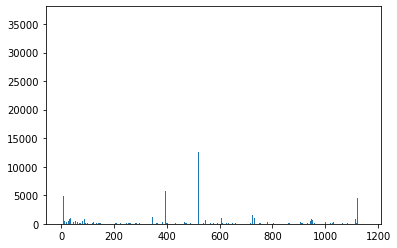

In [122]:
plt.bar(np.arange(len(profile)), list(profile.followers))

In [123]:
alt.Chart(profile).mark_line().encode(
    x='folowers',
)

TypeError: Object of type datetime is not JSON serializable

alt.Chart(...)